In [45]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

methods = ['smina', 'gnina_rescore', 'gnina_refinement']
ligands = ['donepezil', 'galantamine', 'huperzine', 'rivastigmine', 'AC6']


### Plot the Docking score vs RMSD for 'donepezil'

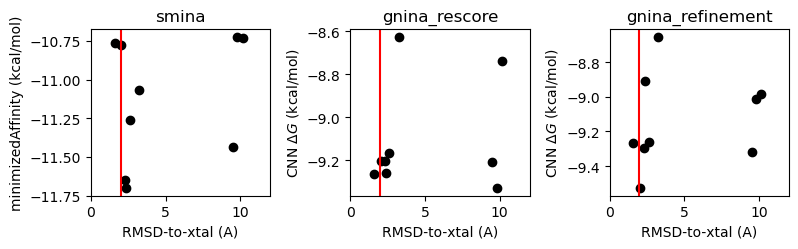

In [46]:
ligand = 'donepezil'

plt.figure(figsize=(8,2.6))
for i in range(len(methods)):
    
    method = methods[i]
    plt.subplot(1,3,i+1)
    
    resultname = f'{method}_{ligand}'
    csvfile = f'docking_results/{resultname}.csv'
    df = pd.read_csv(csvfile)

    if method == 'smina':
        plt.plot( df['RMSD-to-xtal (A)'], df['minimizedAffinity (kcal/mol)'], 'ko' )
        plt.ylabel('minimizedAffinity (kcal/mol)')
        plt.title(method)

    else:
        dG = -0.5924 *np.log(10) * df['CNNaffinity (pKd)'] # in kcal/mol
        plt.plot( df['RMSD-to-xtal (A)'], dG, 'ko' )
        plt.ylabel('CNN $\\Delta G$ (kcal/mol)')
        
    plt.xlabel('RMSD-to-xtal (A)')
    plt.xlim(0, 12)
    plt.axvline(2.0, color='red')
    plt.title(method)
        
plt.tight_layout()
    

### Plot the best docking score ∆G versus experiment

donepezil dG_exp, dG_pred -11.04460151251592 -11.7018929
galantamine dG_exp, dG_pred -7.770733445183185 -9.40462303
huperzine dG_exp, dG_pred -10.598067096788153 -10.1118393
rivastigmine dG_exp, dG_pred -6.129358142285487 -8.16798115
AC6 dG_exp, dG_pred -8.938413320889591 -11.3401213

donepezil dG_exp, dG_pred -11.04460151251592 -9.328486425481488
galantamine dG_exp, dG_pred -7.770733445183185 -9.389232067895332
huperzine dG_exp, dG_pred -10.598067096788153 -9.11325965574136
rivastigmine dG_exp, dG_pred -6.129358142285487 -8.40295908879858
AC6 dG_exp, dG_pred -8.938413320889591 -10.286254931406605

donepezil dG_exp, dG_pred -11.04460151251592 -9.527929197105964
galantamine dG_exp, dG_pred -7.770733445183185 -9.410659842356608
huperzine dG_exp, dG_pred -10.598067096788153 -8.969249164357928
rivastigmine dG_exp, dG_pred -6.129358142285487 -8.54706520018579
AC6 dG_exp, dG_pred -8.938413320889591 -10.180232835269871



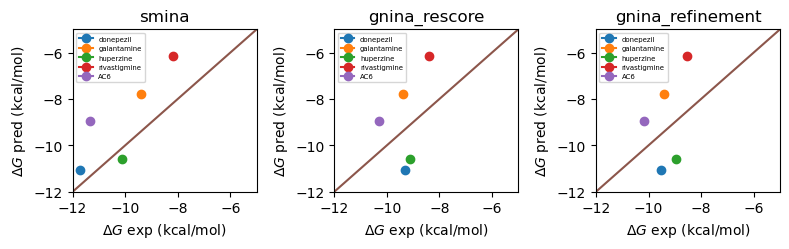

In [54]:
exp = pd.read_csv('input_files/human_AChE_binders.csv')
# print(exp)
  
plt.figure(figsize=(8,2.6))
for i in range(len(methods)):
    
    method = methods[i]
    plt.subplot(1,3,i+1)
    
    for ligand in ligands:
        resultname = f'{method}_{ligand}'
        csvfile = f'docking_results/{resultname}.csv'
        df = pd.read_csv(csvfile)

        IC50_in_nM = float(exp['IC50(nM)'][(exp['ligand'] == ligand)].iloc[0])
        dG_exp = 0.5924 * np.log( IC50_in_nM * 1.0e-9 )
        
        if method == 'smina':      
            dG_pred = np.min(df['minimizedAffinity (kcal/mol)'])
            print(ligand,'dG_exp, dG_pred', dG_exp, dG_pred)
            plt.plot( dG_pred, dG_exp, marker='o', label=ligand )

        else:
            dG_pred = np.min( -0.5924 *np.log(10) * df['CNNaffinity (pKd)'].max() ) # in kcal/mol
            print(ligand,'dG_exp, dG_pred', dG_exp, dG_pred)
            plt.plot( dG_pred, dG_exp, marker='o', label=ligand )
        
    plt.xlabel('$\\Delta G$ exp (kcal/mol)')
    plt.ylabel('$\\Delta G$ pred (kcal/mol)')
    plt.xlim(-12, -5)
    plt.ylim(-12, -5)
    plt.plot([-12, -5], [-12, -5])
    plt.legend(loc='best', fontsize=5)
    plt.title(method)

    print(), -5
    
plt.tight_layout()